In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pingouin as pg

In [2]:
df = pd.read_csv('experiment_lesson_4.csv')
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


### Описание данных
- order_id - id заказа
- delivery_time - время доставки в минутах
- district - район доставки
- experiment_group - экспериментальная группа

In [3]:
df.experiment_group.unique()

array(['control', 'test'], dtype=object)

In [4]:
df.groupby('experiment_group').agg({'order_id':'count'})

,order_id
experiment_group,
control,10092
test,10104


In [5]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


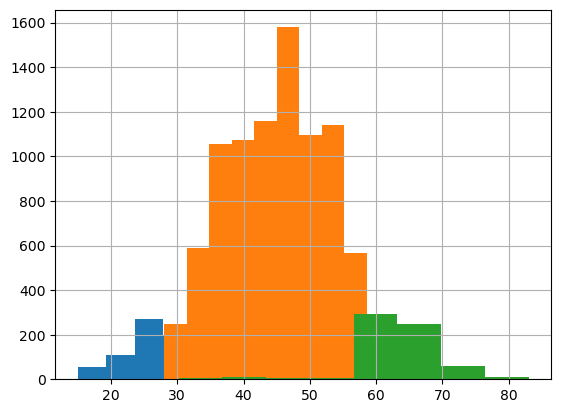

In [6]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist()
plt.show()

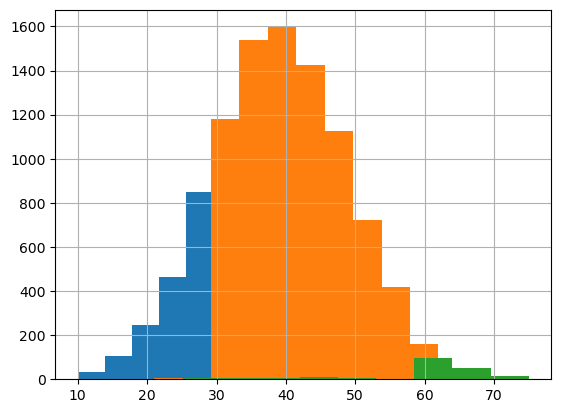

In [7]:
df.query('experiment_group == "test"').groupby('district').delivery_time.hist()
plt.show()

In [8]:
df.groupby('experiment_group').agg({'delivery_time':'mean'})

,delivery_time
experiment_group,
control,45.065101
test,39.046813


In [9]:
df.groupby('experiment_group').agg({'delivery_time':'count'})

,delivery_time
experiment_group,
control,10092
test,10104


In [10]:
df_control = df.query('experiment_group == "control"').delivery_time
df_control

0        44.0
1        51.0
2        46.0
3        34.0
4        43.0
         ... 
10087    23.0
10088    45.0
10089    41.0
10090    38.0
10091    55.0
Name: delivery_time, Length: 10092, dtype: float64

In [11]:
df_test = df.query('experiment_group == "test"').delivery_time
df_test

10092    38.0
10093    31.0
10094    39.0
10095    29.0
10096    31.0
         ... 
20191    42.0
20192    32.0
20193    23.0
20194    41.0
20195    41.0
Name: delivery_time, Length: 10104, dtype: float64

In [12]:
stats.normaltest(df_control)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [13]:
stats.normaltest(df_test)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [14]:
round(np.std(df_control), 2)

9.99

In [15]:
round(np.std(df_test), 2)

9.88

In [16]:
stats.ttest_ind(df_test, df_control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [17]:
stats.ttest_ind(df_test, df_control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [18]:
pg.anova(data=df, dv='delivery_time', between='experiment_group')

,Source,ddof1,ddof2,F,p-unc,np2
0,experiment_group,1,20194,1852.082374,0.0,0.08401


In [19]:
pg.ttest(df_test, df_control)

/opt/anaconda3/lib/python3.9/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-43.035552,20191.127788,two-sided,0.0,"[-6.29, -5.74]",0.605658,inf,1.0
